In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('creditcard.csv')

# Data is highly imbalanced

([<matplotlib.patches.Wedge at 0x17207d106d0>,
 [Text(-1.0999849139505065, 0.005760996554156921, 'genuine'),
  Text(1.099984914296047, -0.005760930577456522, 'fraudulent')])

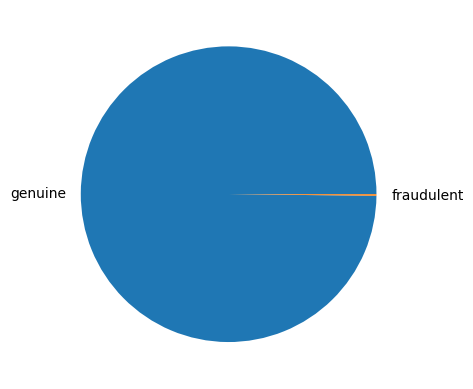

In [3]:
df.drop_duplicates(inplace = True)

X = df.iloc[:, df.columns != 'Class']
y = df.Class;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)

#plot imbalance
counter = Counter(y)
plt.pie([counter[0],counter[1]],labels=['genuine', 'fraudulent'])

# DT without balancing weights

In [4]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate model
yhat = model.predict(X_test)
# summarize performance
model.score(X_test, y_test)

0.9992422373383146

In [5]:
metrics.confusion_matrix(y_test, yhat)

array([[56627,    24],
       [   19,    76]], dtype=int64)

In [6]:
print('F1 Score: %.3f' % f1_score(y_test, yhat))

F1 Score: 0.779


# DT with balancing weights

In [7]:
model2 = tree.DecisionTreeClassifier(class_weight='balanced')
model2.fit(X_train, y_train)
# evaluate model
yhat2 = model2.predict(X_test)
# summarize performance
model2.score(X_test, y_test)

0.9992422373383146

In [8]:
metrics.confusion_matrix(y_test, yhat2)

array([[56634,    17],
       [   26,    69]], dtype=int64)

In [9]:
print('F1 Score: %.3f' % f1_score(y_test, yhat2))

F1 Score: 0.762


# Let's try balanced random forest

In [10]:
model3 = RandomForestClassifier(class_weight='balanced')
model3.fit(X_train, y_train)
# evaluate model
yhat3 = model3.predict(X_test)
# summarize performance
model3.score(X_test, y_test)

0.9995241955380115

In [11]:
metrics.confusion_matrix(y_test, yhat3)

array([[56649,     2],
       [   25,    70]], dtype=int64)

In [12]:
print('F1 Score: %.3f' % f1_score(y_test, yhat3))

F1 Score: 0.838


## Now Naive Bayes

In [13]:
model4 = GaussianNB()
model4.fit(X_train, y_train)
# evaluate model
yhat4 = model4.predict(X_test)
# summarize performance
print("score", model4.score(X_test, y_test))
print("confusion:\n", metrics.confusion_matrix(y_test, yhat4))
print('F1 Score: %.3f' % f1_score(y_test, yhat4))

score 0.9931625136573503
confusion:
 [[56291   360]
 [   28    67]]
F1 Score: 0.257
